# Final Project (Big Data Algorithms and Statistic)
    Submitted By: Sujit Khatiwada
    Student Id: C0835126
    ------------------------------------------------------------------------------------------------------------------------
    Project Objective: Using Data Analysis to find spot common trends in car data then use this information to help clean and feature engineer the data to assist in accurately predicting the prices of cars.  
    
    Dependencies: Pandas, Numpy, Seaborn, Matplotlib, XGBoost, LightGBM, SKLearn, SciPy, and categorical_encoders
    ------------------------------------------------------------------------------------------------------------------------
    
    Table of Contents
    1. Data Selection
    2. Exploratory Data Analysis (EDA)
     2.1. Cleaning the Data & Dealing with Outliers
     2.2 NaN Values
     2.3 Feature Engineering
    3. Split the Data into Training and Test sets
    4. Create a Model (Select models/Algorithm for one best fit model)
    5. Train the Model
    6. Prediction
    7. Evaluation
    8. Conclusion
    9. References

# 1. Dataset Selection
#### The dataset I am using is large and is the world's largest collection of used vehicles for sale. I found this dataset on (https://www.kaggle.com/austinreese/craigslist-carstrucks-data) on kaggle It has already scrapped some 400k+ entries of data. The file is larger than 1.4 GB

In [4]:
# --------- Imports ---------- #
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from IPython.display import Image

# ---- Data Manipulation ----- # 
import category_encoders as ce
from sklearn.model_selection import train_test_split

# ---------- Models ---------- # 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

import lightgbm as lgb

%matplotlib inline

#Note: Make sure to import the libraries that are not available During execution
# for example: !pip install lightgbm , !pip install category_encoders

In [5]:
# Reading in the Data
df = pd.read_csv('vehicles.csv') 
df.info()
# As we can see there are 26 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [3]:
df
# Here we can observe 426880 data rows

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


# 2. Exploratory Data Analysis (EDA)

     First start by modeling the distribution of the 3 important numeric features we are given (Price, Odometer, and Year). Then we'll model the relationship between certain key categorical features and the numerica features.

<AxesSubplot:xlabel='year', ylabel='Count'>

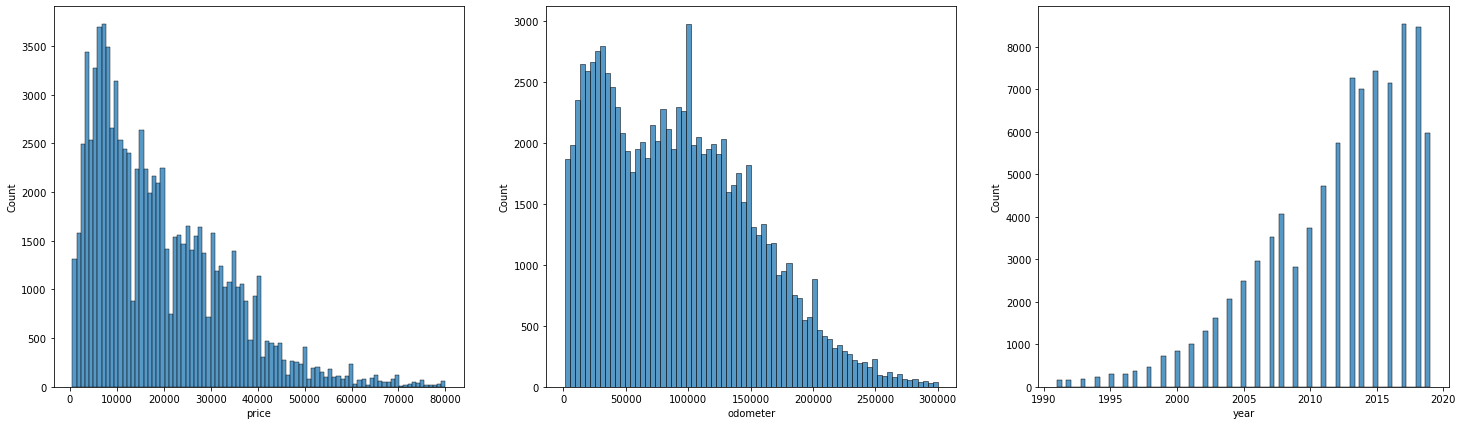

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))

sample = df[['price', 'year', 'transmission', 'fuel', 'type', 'drive', 'manufacturer', 'title_status', 'odometer']].sample(100000)

sample.price = sample.price[sample.price < 80000][sample.price > 500]
sample.odometer = sample.odometer[sample.odometer < 300000][sample.odometer > 1000]
sample.year = sample.year[sample.year < 2020][sample.year > 1990]

numeric_sample = sample[['price', 'odometer', 'year']]

sb.histplot(sample.price, ax = axes[0])
sb.histplot(sample.odometer, ax = axes[1])
sb.histplot(sample.year, ax = axes[2])

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

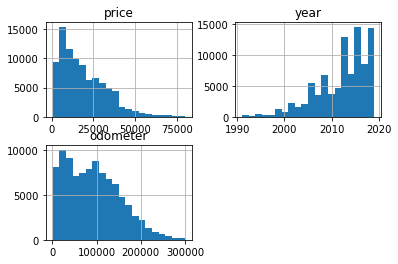

In [7]:
#select all numerical varibales
cars_num = sample.select_dtypes(include=['float64','int64'])
cars_num.hist(bins=20)

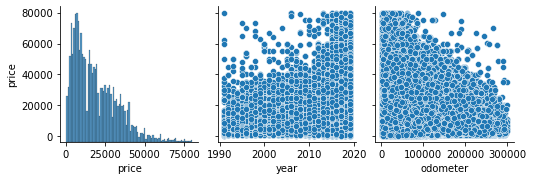

In [9]:
#correlation plots using 'pairplot'
import seaborn as sns
for i in range(0, len(cars_num.columns),5):
    sns.pairplot(cars_num, y_vars=['price'],x_vars=cars_num.columns[i:i+5])

In [5]:
# Restrict the domain even further for this sample data.
sample = sample[sample['year'] > 2010] 

smaller_sample = sample[sample['year'] < 2013] 

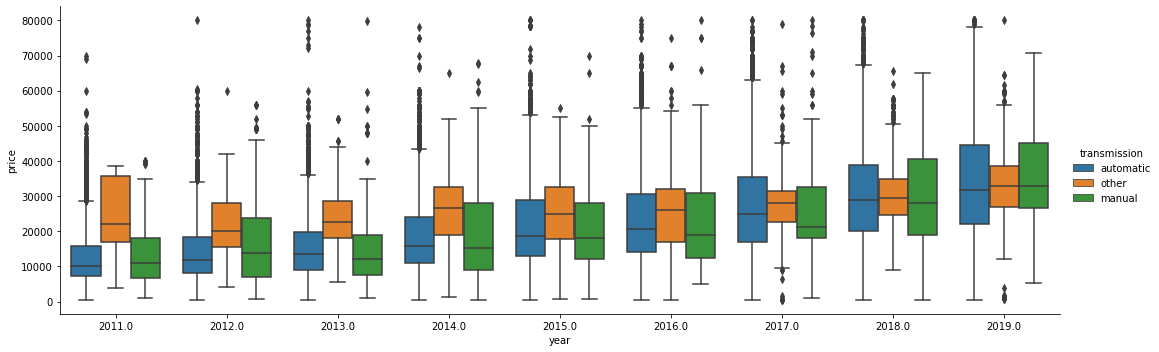

In [6]:
sb.catplot(x = "year", y = "price", hue = "transmission", kind = "box", data = sample, height = 5, aspect = 3)

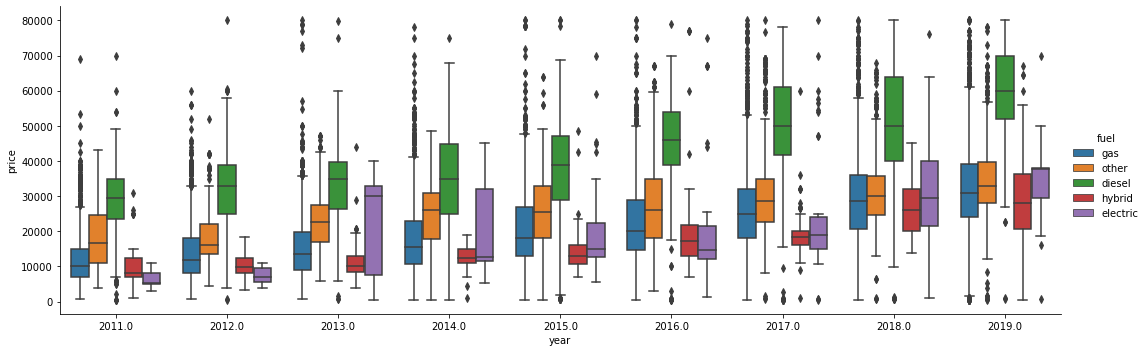

In [7]:
sb.catplot(x = "year", y = "price", hue = "fuel", kind = "box", data = sample, height = 5, aspect = 3)

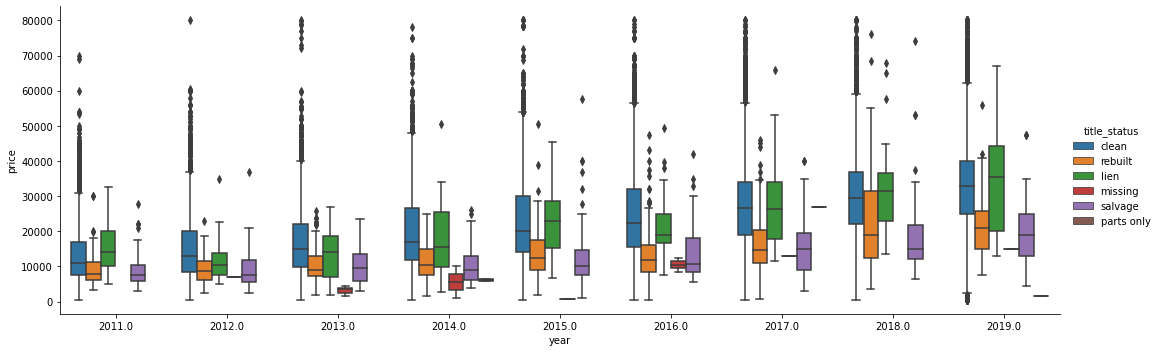

In [8]:
sb.catplot(x = "year", y = "price", hue = "title_status", kind = "box", data = sample, height = 5, aspect = 3)

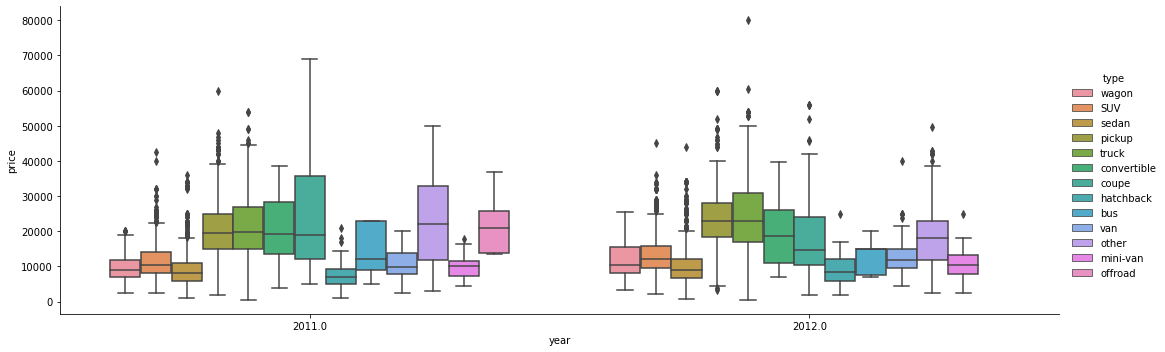

In [9]:
sb.catplot(x = "year", y = "price", hue = "type", kind = "box", data = smaller_sample, height = 5, aspect = 3)

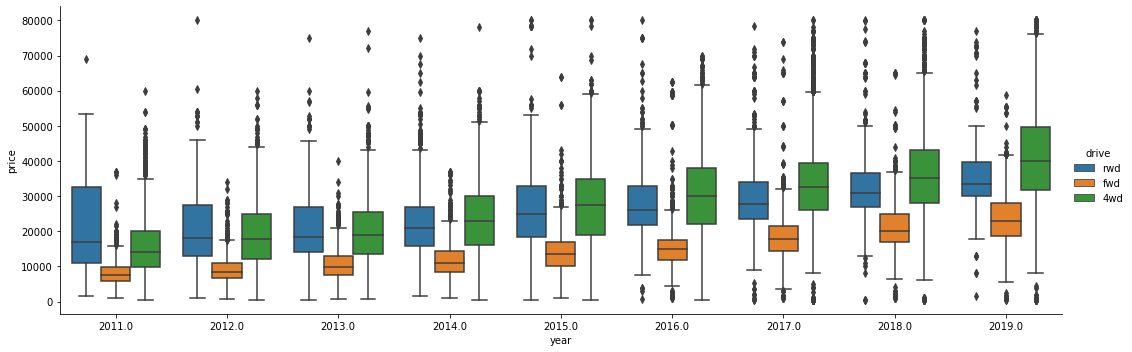

In [10]:
sb.catplot(x = "year", y = "price", hue = "drive", kind = "box", data = sample, height = 5, aspect = 3)

<AxesSubplot:xlabel='price', ylabel='manufacturer'>

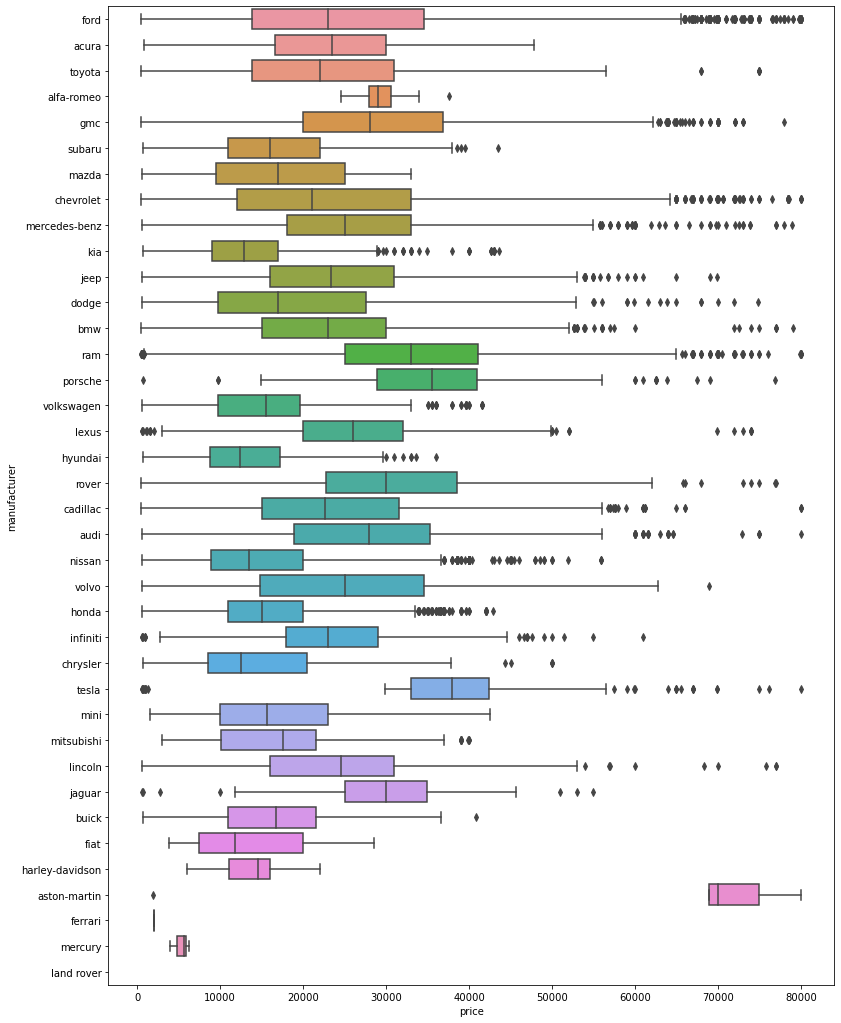

In [11]:
# sb.catplot(x="price", y="manufacturer", hue="manufacturer", kind="box", data=type_data, height=10, aspect=2, notch=True)
fig, ax = plt.subplots(1, 1, figsize = (13, 18))

sb.boxplot(x = 'price', y = 'manufacturer', data = sample)

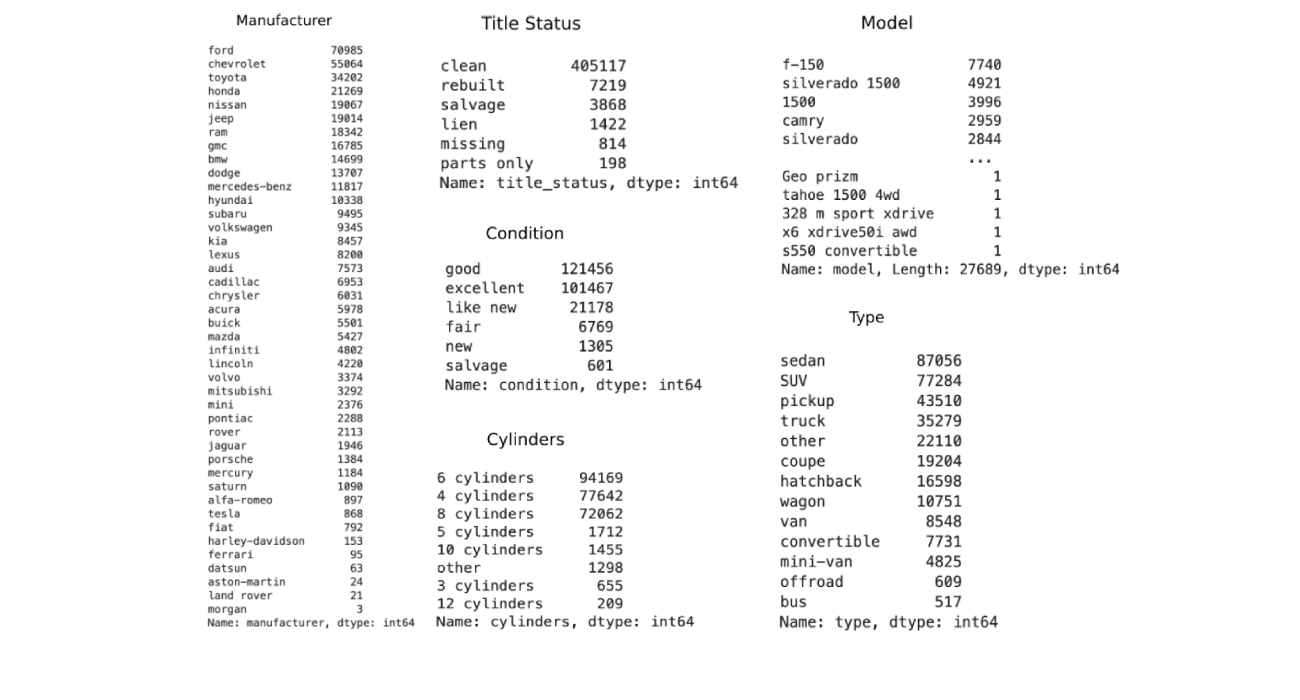

In [12]:
# Understanding the Features
# Counting the number of times certain values appear in each feature we come up with the following:
Image(filename='feature.png') 

### Analysing These Values. We want CAR data , So we want to get rid of bikes, buses or other vehicles.
    
--- Manufacturer: Instantly we can see that we need to remove any "harley-davidson" values because it is a motorcylce brand. On top of that I am also going to remove the "morgan" and "datsun" brand simply because they are smaller brands and their value count is rather small.
    
--- Title Status: Becuase of how large the "clean" title status subset is I am going to remove all of the other features because of the added complexity. Then because I have removed all values but one, I can actually just remove the whole feature (after I remove the other values that is)
    
--- Type: Becuase we are only looking for car data, I am going to remove "other", "offroad", and "bus" types.
    
--- Model: Because I am trying to keep the data consitance I am going to remove any models with less than 5 occurances. This is not something I have optimized, so if you want to optimize the R2 Score I bet this is something you could play around with.
    
--- Condition: For the same reasoning as "Title Status" I am going to remove any "salvage" cars.
    
--- Cylinders: For consistancy I am going to remove any cylinders that classify as "other"

In [14]:
# LOOKING FOR OUTLIERS 

df = df[~df['title_status'].isin(['salvage', 'parts only', 'missing', 'lien', 'rebuilt'])]
df = df[~df['type'].isin(['other', 'offroad', 'bus'])]
df = df[~df['condition'].isin(['salvage'])]
df = df[~df['manufacturer'].isin(['morgan', 'datsun', 'harley-davidson'])]

counts = df['model'].value_counts()

temp = df[~df['model'].isin(counts[counts < 5].index)]

len(df.index)

389922

## 2.1. Cleaning the Data & Dealing with Outliers
#### Of the 25 features included in the dataset we are only interested in features with strong correlation to price. It's easy to see that - posting_date, county, image_url, region_url, region_url, description, id, url, region, VIN, long, and lat - won't have a strong correlation to the price and can therefore be removed.

### Important Features of the Dataset:

### Numeric Features:

1. Price
2. Year
3. Odometer
4. Categorical Features:

### Nominal:

5. Manufacturer
6. Type
7. Paint Color
8. Transmission
9. Drive
10. Fuel
11. State

### Ordinal:

12. Condition
13. Cylinders
14. Size

In [15]:
# List of "Bad Features" whos values aren't correlated with price. 

# add back model
bad_features = ['posting_date', 'county', 'image_url', 'region_url', 'region_url', 'description',
                'id', 'url', 'region', 'VIN', 'long', 'lat', 'title_status']

# Remeving these bad features from out Dataset.
df.drop(bad_features, inplace=True, axis=1)

In [16]:
# Outliers
# When dealing with automobile data from Craiglist we are ought to get many outliers because it's prone to human error. 
# For example, look at the code below, the vanilla Dataset has 30,000+ rows with cars listed at 0 dollars, 
# so I am going to restrict most of the inherently numeric features domains in order to help with these outliers.
df.price.value_counts().head()

0       30477
6995     3016
7995     2953
9995     2700
8995     2676
Name: price, dtype: int64

In [17]:
# To start, we have 3 numeric features in which human error can introduct outliers. 
# These features are Price, Odometer, and Year. 
# To simplify our data and remove outliers I could do something like finding the z-score of each feature then remove outliers that way, 
# but because of the sheere number of outliers I believe we have, the z-score itself (and other techniques) will be bais towards these outliers.
# Solution: The easiest way around this is just to restrict the domains themself.

# Removing any cars that don't have price between 500 < x < 80000
df = df[df['price'] > 500]
df = df[df['price'] < 80000] 

# Removing any cars that don't have odometer between 500 < x < 300000
df = df[df['odometer'] < 300000]
df = df[df['odometer'] > 500]

# Removing any cars that don't have year between 2020 < x < 2000
df = df[df['year'] < 2020]
df = df[df['year'] > 2000]

len(df.index)

299313

In [18]:
# We have removed over 100,000 entries which lie beyond this domain restriction.

## 2.2 NaN Values
#### Rather than imputing values, because of the amount of data we have I am just going to drop any NaN values we have in the subet containing "odometer", "cylinders", "manufacturer", and "model" then fill the rest of the NaN values with 0.


In [19]:
# Dropping NaN values actually increased the R2 Score by roughly 5%.

df.dropna(subset = ["odometer", "cylinders", "manufacturer", "model"], inplace=True)

df.fillna("0", inplace=True)

len(df.index)

173174

### 2.3 Feature Engineering
#### There are 11 categorical features that need to be represented numerically. I will use Target Encoding to Encode out features.

In [20]:
Y = df['price'] # Our target Variable

df.drop('price', inplace=True, axis=1)

In [21]:

# ------------- Target Encoding ----------------- #

# Complies Target Encoding for Features (NOT INCLUDING "Manufacturer")
target_encode = ce.TargetEncoder(cols = ['transmission', 'fuel', 'type', 'drive', 'state', 'condition', 
                                         'size', 'cylinders', 'paint_color', 'model', 'manufacturer']).fit(df, Y)

# Applies Target Endcoding and Transforms Dataframe
df = target_encode.transform(df)

In [22]:
# Normalizing & Saving the Data

normalized_df = pd.DataFrame(stats.zscore(df))
normalized_df.to_csv('normalized_cleaned_vehicles.csv')

df.to_csv('cleaned_features.csv')
Y.to_csv('cleaned_targets.csv')

# 3. Split the Data into Training and Test sets

In [23]:
# Splitting the Data.
# I am using 90% of training data

X_train, X_test, y_train, y_test = train_test_split(df, Y, train_size=0.90, test_size=0.1, random_state=42)

test = y_test.to_numpy()

# 4. Create a Model (Select models/Algorithm for one best fit model)

### The models I will be testing out are:
#### 1. Linear Regression
#### 2. K Nearest Regressor
#### 3. Random Forest Regressor

In [24]:
# Linear Regression

LR_model = LinearRegression()
LR_model

LinearRegression()

In [25]:
# K-Nearest-Regressor

KNR_model = KNeighborsRegressor(n_neighbors=5)
KNR_model

KNeighborsRegressor()

In [26]:
# RANDOM FOREST

RFR_model = RandomForestRegressor(random_state = 1) 
RFR_model

RandomForestRegressor(random_state=1)

# 5. Train the Model

In [27]:
# Linear Regression
LR_model.fit(X_train, y_train)

LinearRegression()

In [28]:
# K-Nearest-Regressor
KNR_model.fit(X_train, y_train)

KNeighborsRegressor()

In [30]:
# RANDOM FOREST
RFR_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

# 6. Prediction

In [31]:
# To show accuracy of Models. R2 Score and MAE will be how I evaluate the accuracy.
def accuracy(test_actual, test_predicted, model):
    print("MAE Score : {} | {}".format(sklearn.metrics.mean_absolute_error(test_actual, test_predicted), model))
    print("R2 Score  : {} | {}".format(sklearn.metrics.r2_score(test_actual, test_predicted), model))

In [32]:
# Linear Regression
results = LR_model.predict(X_test)
accuracy(test, results, "Linear Regression")

MAE Score : 3989.4625037609035 | Linear Regression
R2 Score  : 0.7935019643493941 | Linear Regression


In [33]:
# K-Nearest-Regressor

results2 = KNR_model.predict(X_test)
accuracy(test, results2, "K-Nearest-Regressor")

MAE Score : 2980.1761288832427 | K-Nearest-Regressor
R2 Score  : 0.8286518949100921 | K-Nearest-Regressor


In [34]:
# RANDOM FOREST

results3 = RFR_model.predict(X_test)
accuracy(test, results3, "Random Forest Regressor")

MAE Score : 1570.1255731671752 | Random Forest Regressor
R2 Score  : 0.9314103196926281 | Random Forest Regressor


# 7. Evaluation and Improvement

### We can see that Random Forest Regressor clearly performed the best with an R2 Score of 0.931!

In [47]:
# Find important features with Random Forest model
# Until now, I have used all the features given in the model. 
# Now, I will select only the important features, build the model using these features and see its effect on accuracy.

In [77]:
# create the regressor with n_estimators = 100
clf = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [50]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

model           0.573517
year            0.207319
odometer        0.083938
cylinders       0.026330
manufacturer    0.019604
fuel            0.018860
state           0.018569
drive           0.013940
type            0.011119
paint_color     0.010475
condition       0.008619
size            0.004086
transmission    0.003624
dtype: float64

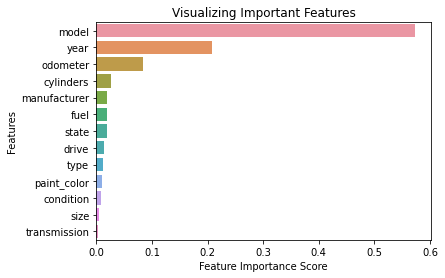

In [51]:
# Creating a seaborn bar plot
import seaborn as sns # statistical data visualization
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
plt.show()

In [67]:
# Now, I will drop the least important features from the model, rebuild the model and check its effect on accuracy.
# declare feature vector and target variable
X = df.drop(['transmission'], axis=1)

In [68]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.90, test_size = 0.1, random_state = 42)
clf.fit(X_train, y_train)

results = clf.predict(X_test)
test = y_test.to_numpy()
accuracy(test, results, "Random Forest Regressor")

MAE Score : 1569.9541276020054 | Random Forest Regressor
R2 Score  : 0.9316656560606599 | Random Forest Regressor


# 8. Conclusion

    -> In this project, I build a Random Forest Classifier to predict the price of the car. 
    -> I build 3 models, Linear, K Means Regressor and Random Forest Regressor
    -> So, as expected accuracy increased for Random Forrest
    -> I have used the Random Forest model to find only the important features, 
    -> I build the model using these features and see its effect on accuracy. 
    -> The most important feature is model and least important feature is transmission.
    -> I have removed the least used variable from the model, rebuild it and checked its accuracy. 
    -> So, we can see that the model accuracy has been slightly improved with transmission variable removed from the model.
    -> They yield good performance.

# 9. References

In [ ]:
# Got a lot of data cleaning ideas from here. Huge shout out to this post: https://www.kaggle.com/nataliadelarosa/car-dataset-eda-price-prediction/data
# Data from kaggle found here: https://www.kaggle.com/austinreese/craigslist-carstrucks-data
# Great example of a data analysis notebook: https://github.com/ryanirl/data-analysis-projects/blob/main/car_price_prediction/car_price_prediction.ipynb
# Learned out featureimportance feature from here: https://www.kaggle.com/vbmokin/used-cars-fe-eda-with-3d-abnormals-filter
# Learned about Target Encoding for this project from this blog post: https://towardsdatascience.com/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809